# PROJECT SUBMISSION BY SUJATHA PATEL

## Project Description – Image classification using CNNs in Keras
Data Description:
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

#### Dataset:
The dataset can be download from Olympus.
The data file names are:
 images.npy
 Label.csv
The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.

The following code was used to convert the large dataset of images to numpy array: # Import necessary libraries. import math import numpy as np import pandas as pd from glob import glob data_path = '/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/train.zip' !mkdir dataset # Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.) from zipfile import ZipFile with ZipFile(data_path, 'r') as zip: zip.extractall('./dataset') path = "/content/dataset/*/*.*" # The path to all images in training set. (* means include all folders and files.) files = glob(path) trainImg = [] # Initialize empty list to store the image data as numbers. trainLabel = [] # Initialize empty list to store the labels of images j = 1 num = len(files) # Obtain images and resizing, obtain labels for img in files: ''' Append the image data to trainImg list. Append the labels to trainLabel list. ''' print(str(j) + "/" + str(num), end="\r") trainImg.append(cv2.resize(cv2.imread(img), (128, 128))) # Get image (with resizing to 128x128) trainLabel.append(img.split('/')[-2]) # Get image label (folder name contains the class to which the image belong) j += 1 trainImg = np.asarray(trainImg) # Train images set trainLabel = pd.DataFrame(trainLabel, columns=["Label"]) # Train labels set print(trainImg.shape) print(trainLabel.shape) trainLabel.to_csv('Labels.csv', index=False) np.save('plantimages', trainImg)
Link to the Kaggle project site: https://www.kaggle.com/c/plant-seedlings-classification/data?select=train

Note: For project purposes, download the data provided on Olympus.
Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

Objective:
To implement the techniques learnt as a part of the course.

Learning Outcomes:
 Pre-processing of image data.
 Visualization of images.
 Building CNN.
 Evaluate the Model.
 The motive of the project is to make the learners capable to handle images/image classification problems, during this
process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.
Guide to solve the project seamlessly:

Here are the points which will help you to solve the problem efficiently:
 Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the
attached problem statement should not be missed.
 Download the dataset from the Olympus platform.
 Upload the "images.npy" and “Labels.csv” file to google drive.
 Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem
statement.
 You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your
model.

Steps and tasks:
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.
3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

Note:
 Download the train images from the Olympus Platform.
 Do not download the dataset from Kaggle, as:
o The dataset is big.
o The dataset has 2 files for train and test images, but the labels are only for the train file. Test file has no
labels associated with it. So, when you want to know the accuracy of model on test images, there’s no way
to measure it. That’s why the data provided to you on Olympus has only train images and their labels. For
our purpose we use this for our training and testing and validation purpose.

In [ ]:
# conda install tensorflow (run at anaconda3)
# conda install keras  (run at anaconda3)
# conda install seaborn (run at anaconda3)
#!pip install utils
#!pip install tensorflow

### Import Libraries and Data Load

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D

from mpl_toolkits.axes_grid1 import ImageGrid

import os
import time

# Import necessary libraries.
import cv2
from google.colab.patches import cv2_imshow

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
def dispImage(Img,print_label,groupby=True,no_img=12):
    fig = plt.figure(1, figsize=(Num_group,Num_group))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 12), axes_pad=0.05)
    j = 0
    if groupby == True:
      for idx in Lbl2[Lbl2['Label']==print_label]['index']:
            if j < no_img:
                #img_t = cv2.resize(Img[idx],dsize =(shape*3,shape*3),interpolation = cv2.INTER_AREA)
                img_t = cv2.resize(Img[idx],(128,128))
                ax = grid[j] #Put img into grid with specific position
                ax.imshow(img_t)
                ax.axis('off')
                j = j + 1
            else:
                #Display each group name across each row
                ax.text(250, 0, print_label, verticalalignment='center')
                break
    else:
      for j in range(0,24):
        print("test")
         #if j < no_img:
        #img_t = cv2.resize(Img[j],dsize =(shape,shape),interpolation = cv2.INTER_AREA)
        ax = grid[j] #Put img into grid with specific position
        ax.imshow(Img[j])
        ax.axis('off')
         #   else:
         #       #Display each group name across each row
         #       ax.text(150, 0, print_label, verticalalignment='center')
         #       break
    plt.show()

def showImgInfo(Img):
    Lbl2 = Lbl.reset_index()   
    for i in group:
        print('Images in {} = {}'.format(i,Lbl2[Lbl2['Label']==i]['Label'].count()))

def processImage(data,extract = False,lwr_hsv=None,upr_hsv=None,istrain="Yes"):
        img_data=[]
        getImg = True
        for i in range(0,len(Img)):
            img = Img[i]
            if lwr_hsv and upr_hsv :
                blurr = cv2.GaussianBlur(img,(5,5),0)
                hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
                mask = cv2.inRange(hsv,lwr_hsv,upr_hsv)
                struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
                mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
                boolean = mask>0
                new_img = np.zeros_like(img,np.uint8)
                new_img[boolean] = img[boolean]
                res_img = new_img
                if getImg and (istrain == "Yes" and i == 0) or (istrain == "No" and i == 900 ) : 
                    plt.subplot(2,3,1);plt.imshow(img)
                    plt.subplot(2,3,2);plt.imshow(blurr)
                    plt.subplot(2,3,3);plt.imshow(hsv) 
                    plt.subplot(2,3,4);plt.imshow(mask) 
                    plt.subplot(2,3,5);plt.imshow(boolean)
                    plt.subplot(2,3,6);plt.imshow(new_img)
                    plt.axis('off')
                    plt.show()
                    getImg = False
            else:
                raise ValueError('Invalid - lwr_hsv/upr_hsv arguments')
            rez_img = cv2.resize(res_img,dsize =(shape,shape),interpolation = cv2.INTER_AREA)
            rez_img = rez_img.reshape(shape,shape,channel)
            Img[i] = rez_img
            img_data.append(rez_img)
        return img_data

def cnn_model(width, height, ch , Num_classes):
    model = Sequential()

    model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu',input_shape=(width, height, ch)))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization(axis=3))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization(axis=3))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization(axis=3))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(256, activation = "relu")) #Fully connected layer
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(60, activation = "relu")) #Fully connected layer
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(Num_classes, activation = "softmax")) #Classification layer or output layer

    model.summary()

    return model

def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)

def plot_loss_acc_curves(history):
      """Plot the loss and accuracy curves for training and validation data"""
      fig, ax = plt.subplots(2,1)
      ax[0].plot(history.history['loss'], color='b', label="Training loss")
      ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
      legend = ax[0].legend(loc='best', shadow=True)

      ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
      ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
      legend = ax[1].legend(loc='best', shadow=True)
      plt.show()

def cls_report(model,Ytrue,YPred):
        print("Classification report for classifier %s:\n%s\n"
              % (model, metrics.classification_report(Ytrue, YPred)))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks")
!ls

'Copy of SUJATHA PATEL Project 7 - CNN.ipynb'   images.npy   __pycache__
 drive_module.py			        Labels.csv


Print the Shape of the Data

In [ ]:
t1=time.time()
Img = np.load("/content/drive/My Drive/Colab Notebooks/images.npy")
Lbl = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Labels.csv")

t2=time.time()

print(f"Time took to load: {t2-t1} seconds.")
print('\nShape [images]: ',Img.shape,'\nShpae [Labels]',Lbl.shape)
size = 128
shape = 128
channel = 3

Time took to load: 6.512847661972046 seconds.

Shape [images]:  (4750, 128, 128, 3) 
Shpae [Labels] (4750, 1)


In [ ]:
print(Img[0])

[[[ 35  52  78]
  [ 36  49  76]
  [ 31  45  69]
  ...
  [ 78  95 114]
  [ 76  93 110]
  [ 80  95 109]]

 [[ 33  46  68]
  [ 37  50  73]
  [ 48  65  83]
  ...
  [ 81  96 113]
  [ 74  89 105]
  [ 83  95 109]]

 [[ 34  50  68]
  [ 35  52  72]
  [ 70  85 101]
  ...
  [ 83  97 112]
  [ 79  94 108]
  [ 79  94 107]]

 ...

 [[ 35  50  69]
  [ 42  57  73]
  [ 42  57  72]
  ...
  [ 60  76  92]
  [ 67  81  97]
  [ 64  77  95]]

 [[ 36  52  67]
  [ 48  63  78]
  [ 41  57  73]
  ...
  [ 44  66  83]
  [ 58  76  91]
  [ 57  74  90]]

 [[ 44  58  70]
  [ 43  57  73]
  [ 40  55  72]
  ...
  [ 41  70  92]
  [ 55  78  97]
  [ 61  79  96]]]


In [ ]:
group = Lbl.Label.unique()

In [ ]:
showImgInfo(Img)

Images in Small-flowered Cranesbill = 496
Images in Fat Hen = 475
Images in Shepherds Purse = 231
Images in Common wheat = 221
Images in Common Chickweed = 611
Images in Charlock = 390
Images in Cleavers = 287
Images in Scentless Mayweed = 516
Images in Sugar beet = 385
Images in Maize = 221
Images in Black-grass = 263
Images in Loose Silky-bent = 654


Visualize the Images on Datasaet

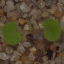

Bigger Image


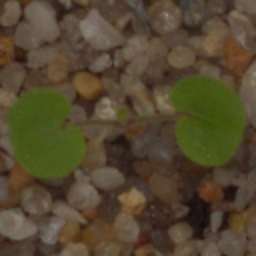

In [ ]:
half = cv2.resize(Img[0], (64, 64)) # original image was (220, 220), so now the new size given is half i.e. (110, 110) pixels.
bigger = cv2.resize(Img[0], (256, 256)) # original image was (220, 220), so now the new size given is double i.e. (440, 440) pixels.
cv2_imshow(half)
print('Bigger Image')
cv2_imshow(bigger)

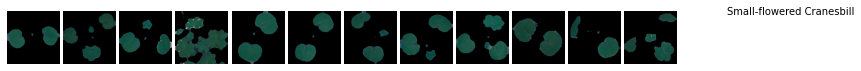

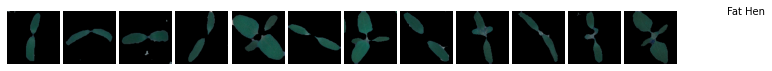

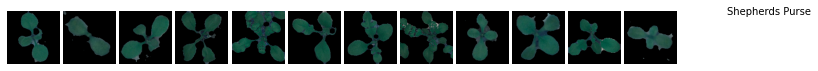

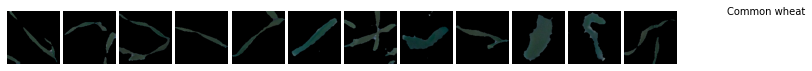

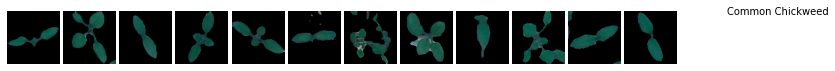

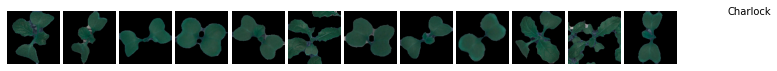

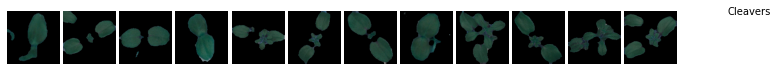

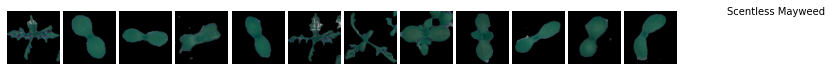

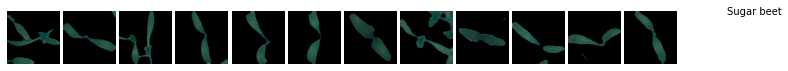

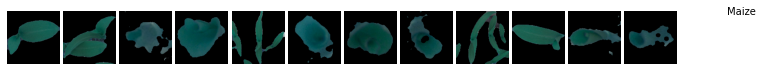

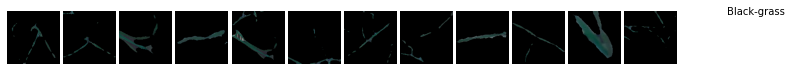

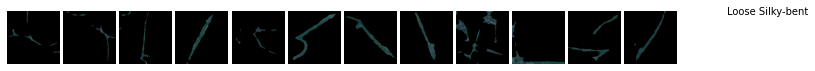

In [ ]:
''' Visualize the sample of 12 pictures from each category '''
from mpl_toolkits.axes_grid1 import ImageGrid
Lbl2 = Lbl.reset_index()
Lbl2.head()
Num_group = len(group)
for i in group:
     dispImage(Img,i,True)


Gaussian Blurring and Visualize data after pre-processing



Img Dataset: After Image Processing 


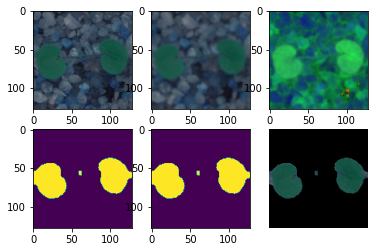

In [ ]:
""" Load Train and Test Data """
lower = (25,40,50)
upper = (75,255,255)
print('\n')
print('Img Dataset: After Image Processing ')
ProImg = processImage(Img,extract=True,lwr_hsv=lower,upr_hsv=upper,istrain="Yes")

The original shape of the data is 128, 128, 3. its already in the compatible shape.

In [ ]:
from sklearn.model_selection import train_test_split
X = Img

Normalization

In [ ]:
"""Normalization"""
#Pixels ranges [0-255]
X = X/255.0

Convert labels to one-hot-vectors
- Instead of one-hot-vectors, I prefer to use LabelBinarizer in order to identify the labels later part.

In [ ]:
"""Label encoding target variable """
y = np.array(Lbl.iloc[:])
#labels = preprocessing.LabelEncoder()
#labels.fit(group)
#encoded = labels.transform(y)
#print('\n')
#print('Classes '+str(labels.classes_))
#""" One Hot Encoding """
#y = to_categorical(encoded)
#print(y)


Split the dataset into training, testing, and validation set

In [ ]:
"""Split training and tests sets"""
### Split the dataset into training, testing, and validation set.
### (Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
### into test and validation set with test_size = 0.5)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3,random_state=2) 
Xtest, Xval, ytest, yval = train_test_split(Xtest,ytest, test_size=0.5,random_state=2,stratify=ytest) 
print('\n---Split training,tests and validation sets---')
print('Xtrain shape : {}'.format(Xtrain.shape))
print('ytrain shape : {}'.format(ytrain.shape))
print('  Xtest shape : {}'.format(Xtest.shape))
print('  ytest shape : {}'.format(ytest.shape))
print('  Xval shape : {}'.format(Xval.shape))
print('  yval shape : {}'.format(yval.shape))


---Split training,tests and validation sets---
Xtrain shape : (3325, 128, 128, 3)
ytrain shape : (3325, 1)
  Xtest shape : (712, 128, 128, 3)
  ytest shape : (712, 1)
  Xval shape : (713, 128, 128, 3)
  yval shape : (713, 1)


One-Hot-Vector replaced with LabelBinarizer

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
ytrain = encoder.fit_transform(ytrain)
ytest = encoder.fit_transform(ytest)
yval = encoder.fit_transform(yval)
y.dtype

dtype('O')

Print the label for y_train[0]

In [ ]:
ytrain[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
#### 3.d Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [ ]:
print('\n---Shape of Train, Test and Validation sets---')
print('xtrain shape : {}'.format(Xtrain.shape))
print('ytrain shape : {}'.format(ytrain.shape))
print('xtest shape : {}'.format(Xtest.shape))
print('ytest shape : {}'.format(ytest.shape))
print('  xval shape : {}'.format(Xval.shape))
print('  yval shape : {}'.format(yval.shape))


---Shape of Train, Test and Validation sets---
xtrain shape : (3325, 128, 128, 3)
ytrain shape : (3325, 12)
xtest shape : (712, 128, 128, 3)
ytest shape : (712, 12)
  xval shape : (713, 128, 128, 3)
  yval shape : (713, 12)


Building CNN

Define layers (its covered in cnn_model)

Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy)


In [ ]:
model = cnn_model(size,size,channel,len(group))
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 124, 124, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 64)      102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       2

 This is our trained CNN model which, after running 100 epochs on the training set, returned an accuracy of around 96.61%\nAs we can see with the 100th EPOCH loss is minimized and the accuracy has increased. 

Fit and evaluate model and print confusion matrix

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(Xtrain)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

"""Fit the model"""
epochs = 80
batch_size = 100

history = model.fit_generator(datagen.flow(Xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (Xval,yval),
                              verbose = 2, steps_per_epoch=Xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
33/33 - 14s - loss: 2.8504 - accuracy: 0.2053 - val_loss: 14.2415 - val_accuracy: 0.0477
Epoch 2/80
33/33 - 13s - loss: 2.1521 - accuracy: 0.3259 - val_loss: 10.7324 - val_accuracy: 0.0954
Epoch 3/80
33/33 - 13s - loss: 1.9209 - accuracy: 0.3690 - val_loss: 6.0489 - val_accuracy: 0.0266
Epoch 4/80
33/33 - 13s - loss: 1.7462 - accuracy: 0.4143 - val_loss: 13.4325 - val_accuracy: 0.0743
Epoch 5/80
33/33 - 13s - loss: 1.6125 - accuracy: 0.4443 - val_loss: 19.4615 - val_accuracy: 0.0561
Epoch 6/80
33/33 - 13s - loss: 1.4897 - accuracy: 0.4834 - val_loss: 21.6283 - val_accuracy: 0.0561
Epoch 7/80
33/33 - 13s - loss: 1.3924 - accuracy: 0.5194 - val_loss: 20.3858 - val_accuracy: 0.0561
Epoch 8/80

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
33/33 - 13s - loss: 1.3845 - accuracy: 0.5166 - val_loss: 19.3513 - val_accuracy: 0.0561
Epoch 9/80
33/33 - 13s - loss: 1.2849 - accu

# Due to Ram usage on my laptop, I have executed the above within the RAM limit. Based on the above, we managed to bring the accuracy to 90% with the loss reduced to less than or nearer to 30%

Evaluate the Model

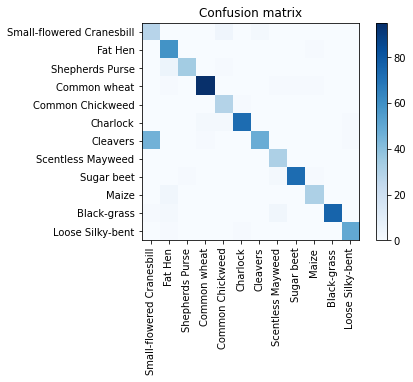

In [56]:
"""Evaluate the model"""

Y_pred = model.predict(Xval)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = group)


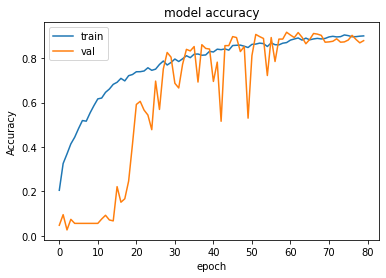

In [57]:
#Accuracy vs value accuracy
history.history.keys()
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],
loc='upper left')
plt.show()

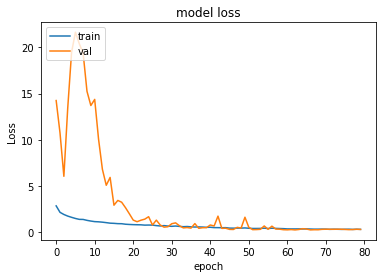

In [58]:
#Loss vs value loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','val'],
loc='upper left')
plt.show()

In [59]:
cls_report(history,Y_true,Y_pred_classes)

Classification report for classifier <tensorflow.python.keras.callbacks.History object at 0x7f00d4e98f28>:
              precision    recall  f1-score   support

           0       0.37      0.82      0.51        34
           1       0.83      0.98      0.90        60
           2       0.97      0.85      0.91        40
           3       0.97      0.96      0.96        99
           4       0.81      0.97      0.88        30
           5       0.97      0.94      0.95        78
           6       0.96      0.50      0.66        96
           7       0.84      1.00      0.91        31
           8       0.99      0.95      0.97        77
           9       0.91      0.91      0.91        34
          10       1.00      0.93      0.96        82
          11       0.96      0.96      0.96        52

    accuracy                           0.88       713
   macro avg       0.88      0.90      0.87       713
weighted avg       0.92      0.88      0.88       713




In [ ]:
loss, accuracy = model.evaluate(Xtest, ytest)
print('Test loss: {:.2f} \n Test accuracy: {:.2f}'.format(loss, accuracy))

loss, accuracy = model.evaluate(Xtrain, ytrain)
print('Train loss: {:.2f} \n Train accuracy: {:.2f}'.format(loss, accuracy))

23/23 [==============================] - 0s 16ms/step - loss: 0.3269 - accuracy: 0.8652
Test loss: 0.33 
 Test accuracy: 0.87
104/104 [==============================] - 2s 17ms/step - loss: 0.2934 - accuracy: 0.8719
Train loss: 0.29 
 Train accuracy: 0.87


The model for both Training accuracy and testing accuracy is almost nearer, hence, we keep this model fit and no further adjustment required to rerun the model again.

6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

Predicted label: Loose Silky-bent


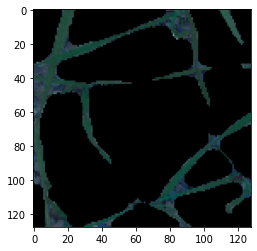

In [ ]:
y_pred = encoder.inverse_transform(Y_pred)
index = 2
plt.imshow(Xtest[index], cmap='gray')
print("Predicted label:", y_pred[index])  

Predicted label: Scentless Mayweed


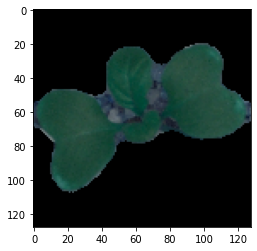

In [ ]:
index = 3
plt.imshow(Xtest[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Scentless Mayweed


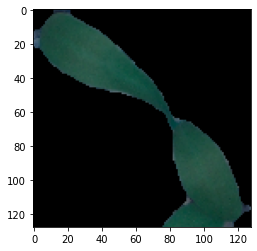

In [ ]:
index = 33
plt.imshow(Xtest[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Small-flowered Cranesbill


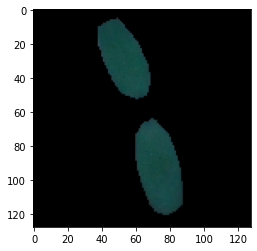

In [ ]:
index = 36
plt.imshow(Xtest[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Common Chickweed


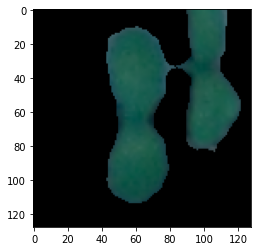

In [ ]:
index = 59
plt.imshow(Xtest[index], cmap='gray')
print("Predicted label:", y_pred[index])

# Note: Based on the 87% of accuracy, the above names expected 87% to be correct. Since there was no expected accuracy requeted in this project, I would assume, the accuracy more than 85% is good fit for this model and the model can be further improved if we need to improvise the accuracy when needed. 

End Of Project


